In [134]:
from src.final_product import PlantForecast
import src.cross_validation as cv
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
import os
import src.modis_preprocessing as mpre
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import time

In [135]:
pf = PlantForecast()

In [136]:
pf.load_metadata()

In [137]:
pf.load_ndvi(preloaded=True)

In [138]:
pf.load_weather(preloaded=True)

In [139]:
pf.merge_modis_weather()

In [142]:
pf.combined

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin,NDVI,intercept
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025,2652.74,1
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822,2808.49,1
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829,2901.39,1
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756,3185.68,1
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232,3323.33,1
2000-05-24,17.3476,0.577485,26.0855,254.741,86.7838,23.4076,6.43044,124.393,192.488,30.2449,3295.61,1
2000-06-09,31.4554,0.00751202,2.89422,293.203,125.198,25.005,5.12923,99.5006,216.337,51.9583,3362.7,1
2000-06-25,33.1161,0.00392512,1.68845,285.681,129.549,26.6221,3.14448,70.8956,238.767,74.795,3602.57,1
2000-07-11,23.1412,0,9.9421,300.674,149.305,24.2059,0.712083,43.5435,262.317,97.3196,3611.14,1
2000-07-27,12.3698,0,8.63094,330.415,157.86,23.1734,0.287182,23.8011,282.469,117.471,3233.62,1


In [140]:
model_data=pf.combined

In [141]:
model_data.head()

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin,NDVI,intercept
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025,2652.74,1
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822,2808.49,1
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829,2901.39,1
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756,3185.68,1
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232,3323.33,1


In [118]:
model_data.columns

Index(['PRCP', 'SNOW', 'SNOWD', 'TMAX', 'TMIN', 'LT_precip', 'LT_snow',
       'LT_snowd', 'LT_tmax', 'LT_tmin', 'intercept'],
      dtype='object')

In [119]:
train_df, test_df=pf.train_test_split_by_year(test_years=list(range(2000,2018)))

In [120]:
train_df.head()

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin,intercept
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025,1
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822,1
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829,1
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756,1
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232,1


In [89]:
X_train= train_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip','LT_snow','LT_snowd', 'LT_tmax','LT_tmin']]
y_train = train_df[['NDVI']].values

In [105]:
X_train

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232
2000-05-24,17.3476,0.577485,26.0855,254.741,86.7838,23.4076,6.43044,124.393,192.488,30.2449
2000-06-09,31.4554,0.00751202,2.89422,293.203,125.198,25.005,5.12923,99.5006,216.337,51.9583
2000-06-25,33.1161,0.00392512,1.68845,285.681,129.549,26.6221,3.14448,70.8956,238.767,74.795
2000-07-11,23.1412,0,9.9421,300.674,149.305,24.2059,0.712083,43.5435,262.317,97.3196
2000-07-27,12.3698,0,8.63094,330.415,157.86,23.1734,0.287182,23.8011,282.469,117.471


In [108]:
X_test= test_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip','LT_snow','LT_snowd', 'LT_tmax','LT_tmin']]
y_test = test_df[['NDVI']].values

In [109]:
X_test.head()

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232


In [91]:
def test_for_longterm_mean(high=150):
    score_list=[]
    range_list=[]
    mse_list=[]
    pf=PlantForecast()
    pf=pf.load_metadata()
    pf=pf.load_ndvi(preloaded=True)
    pf=pf.load_weather(preloaded=True)
    for e in range(40,high,10):
        start=time.time()
        pf.merge_modis_weather(longterm=e)
        train_df, test_df=pf.train_test_split_by_year(test_year=list(range(2010,2018)))
        
        X_train = train_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip']]
        y_train = train_df[['NDVI']].values
        
        X_test = test_df[['PRCP','SNOW','SNOWD','TMAX','TMIN','LT_precip']]
        y_test = test_df[['NDVI']].values
        
        #model = GradientBoostingRegressor(loss='ls', n_estimators=10000,learning_rate=0.001,max_depth=100,subsample=0.8)
        model = Ridge()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        score = model.score(X_test,y_test)
        mse = mean_squared_error(y_test, y_pred)
        
        mse_list.append(mse)
        score_list.append(score)
        range_list.append(e)
        model = None
        print(f'Checked average for {e} days in {time.time()-start} seconds with score {score}, and mse: {mse}')
    return score_list, range_list, mse_list
        
        
        
         
        

In [92]:
scores, days, mse = cv.test_for_longterm_mean()

Checked average for 40 days in 1.1021900177001953 seconds with score 0.7467914151030498, and mse: 49316.23928143762
Checked average for 50 days in 1.0433330535888672 seconds with score 0.7574455778063061, and mse: 47241.1783689848
Checked average for 60 days in 1.0569689273834229 seconds with score 0.7651931566380726, and mse: 45732.219059115036
Checked average for 70 days in 1.105565071105957 seconds with score 0.7780389243403794, and mse: 43230.30959969231
Checked average for 80 days in 1.110753059387207 seconds with score 0.7843733468935132, and mse: 41996.58405888088
Checked average for 90 days in 1.096369981765747 seconds with score 0.7862875143254934, and mse: 41623.77071553124
Checked average for 100 days in 0.9711790084838867 seconds with score 0.7922522934590652, and mse: 40462.03887641577
Checked average for 110 days in 0.9831318855285645 seconds with score 0.7954358752325374, and mse: 39841.98770170354
Checked average for 120 days in 1.005127191543579 seconds with score 0.79

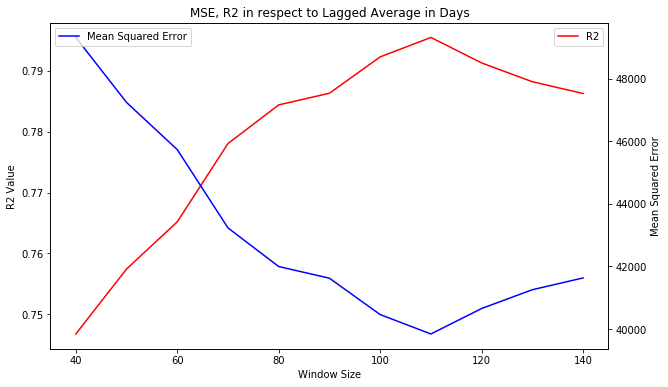

In [93]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(days, scores, color='red', label='R2')

ax2 = ax.twinx()
ax2.plot(days, mse, color='blue', label='Mean Squared Error')
ax.set_ylabel('R2 Value')
ax2.set_ylabel('Mean Squared Error')
ax.set_xlabel('Window Size')
ax.set_title('MSE, R2 in respect to Lagged Average in Days')
ax.legend(loc=1)
ax2.legend(loc=2)

In [94]:
model = None
model = GradientBoostingRegressor(loss='ls', n_estimators=10000,
                                  learning_rate=0.001,max_depth=100,subsample=0.8)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
model_score=model.score(X_test,y_test)

/Users/Berzyy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
gradient_importance = model.feature_importances_

In [96]:
gradient_importance

array([0.09946379, 0.06107955, 0.08163403, 0.09193512, 0.28333082,
       0.12482361, 0.05863096, 0.07820555, 0.06484767, 0.05604891])

In [97]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
rf_score=rf.score(X_test,y_test)

/Users/Berzyy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [98]:
lin= LinearRegression()
lin.fit(X_train,y_train)
lin_pred= lin.predict(X_test)
lin_score = lin.score(X_test,y_test)

In [99]:
ridge= Ridge()
ridge.fit(X_train,y_train)
ridge_pred= ridge.predict(X_test)
ridge_score=ridge.score(X_test,y_test)

In [100]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
lasso_score= lasso.score(X_test,y_test)

/Users/Berzyy/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [101]:
model.score(X_test,y_test)

0.8712151677941714

In [102]:
mean_squared_error(y_test, y_pred)

23882.653333700753

In [107]:
X_test.head()

,PRCP,SNOW,SNOWD,TMAX,TMIN,LT_precip,LT_snow,LT_snowd,LT_tmax,LT_tmin
2000-03-05,23.6209,7.9926,162.765,143.783,-13.0523,14.9744,7.46165,120.902,122.668,-31.5025
2000-03-21,23.0775,15.5269,184.975,141.692,-16.2122,16.575,9.05479,133.558,126.426,-28.4822
2000-04-06,37.0565,10.7587,175.614,168.873,17.915,19.9534,9.33585,140.495,133.427,-20.829
2000-04-22,15.6428,1.64556,118.099,209.941,39.7163,20.0403,8.28731,143.252,150.122,-6.02756
2000-05-08,25.9922,0.96907,72.7078,246.2,73.991,22.0309,7.19832,139.628,171.1,10.0232


No handles with labels found to put in legend.


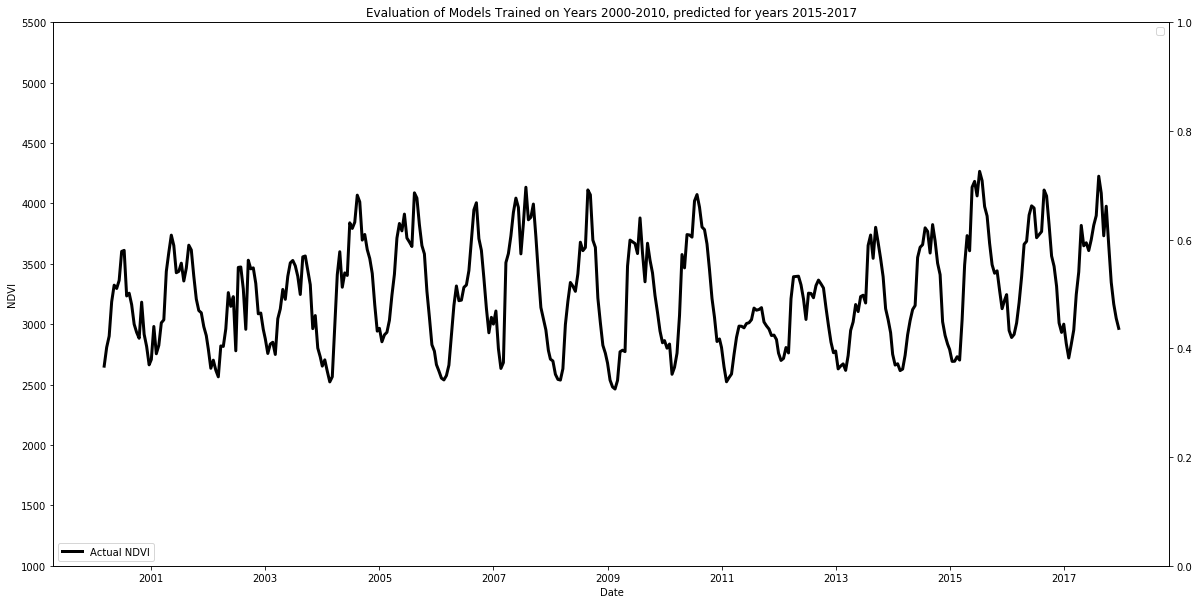

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(X_test.index,y_test, label='Actual NDVI', color='Black', linewidth=3)
#ax.plot(X_test.index, y_pred, label=f'Gradient Boosted Predicted NDVI {model_score}', color='orange')
#ax.plot(X_test.index, rf_pred, label=f'Random Forest Predicted NDVI {rf_score}', color='green')
#ax.plot(X_test.index, lin_pred, label=f'Linear Regression Predicted NDVI {lin_score}')
#ax.plot(X_test.index, ridge_pred, label=f'Ridge Regression Predicted NDVI {ridge_score}', color='red')
#ax.plot(X_test.index, lasso_pred, label=f'Lasso Regression Predicted NDVI {lasso_score}', color='blue')

ax2 = ax.twinx()
#ax2.plot(X_test.index, X_test['TMAX'], color='Red',linestyle=':')
#ax2.plot(X_test.index, X_test['TMIN'], color='teal',linestyle=':')

#ax3= ax2.twinx()
#ax3.bar(X_test.index, -X_test['PRCP'].astype(float), 3,label='precipitation',color='blue')
#ax3.bar(X_test.index, -X_test['SNOW'].astype(float), 3,label='snow',color='yellow')
#ax3.set_ylim(-200,0)


ax.set_title('Evaluation of Models Trained on Years 2000-2010, predicted for years 2015-2017')
ax.set_ylabel('NDVI')
ax.set_xlabel('Date')
ax.set_ylim(1000,5500)
ax.legend(loc=3)
ax2.legend(loc=1)
#ax3.legend(loc=2)




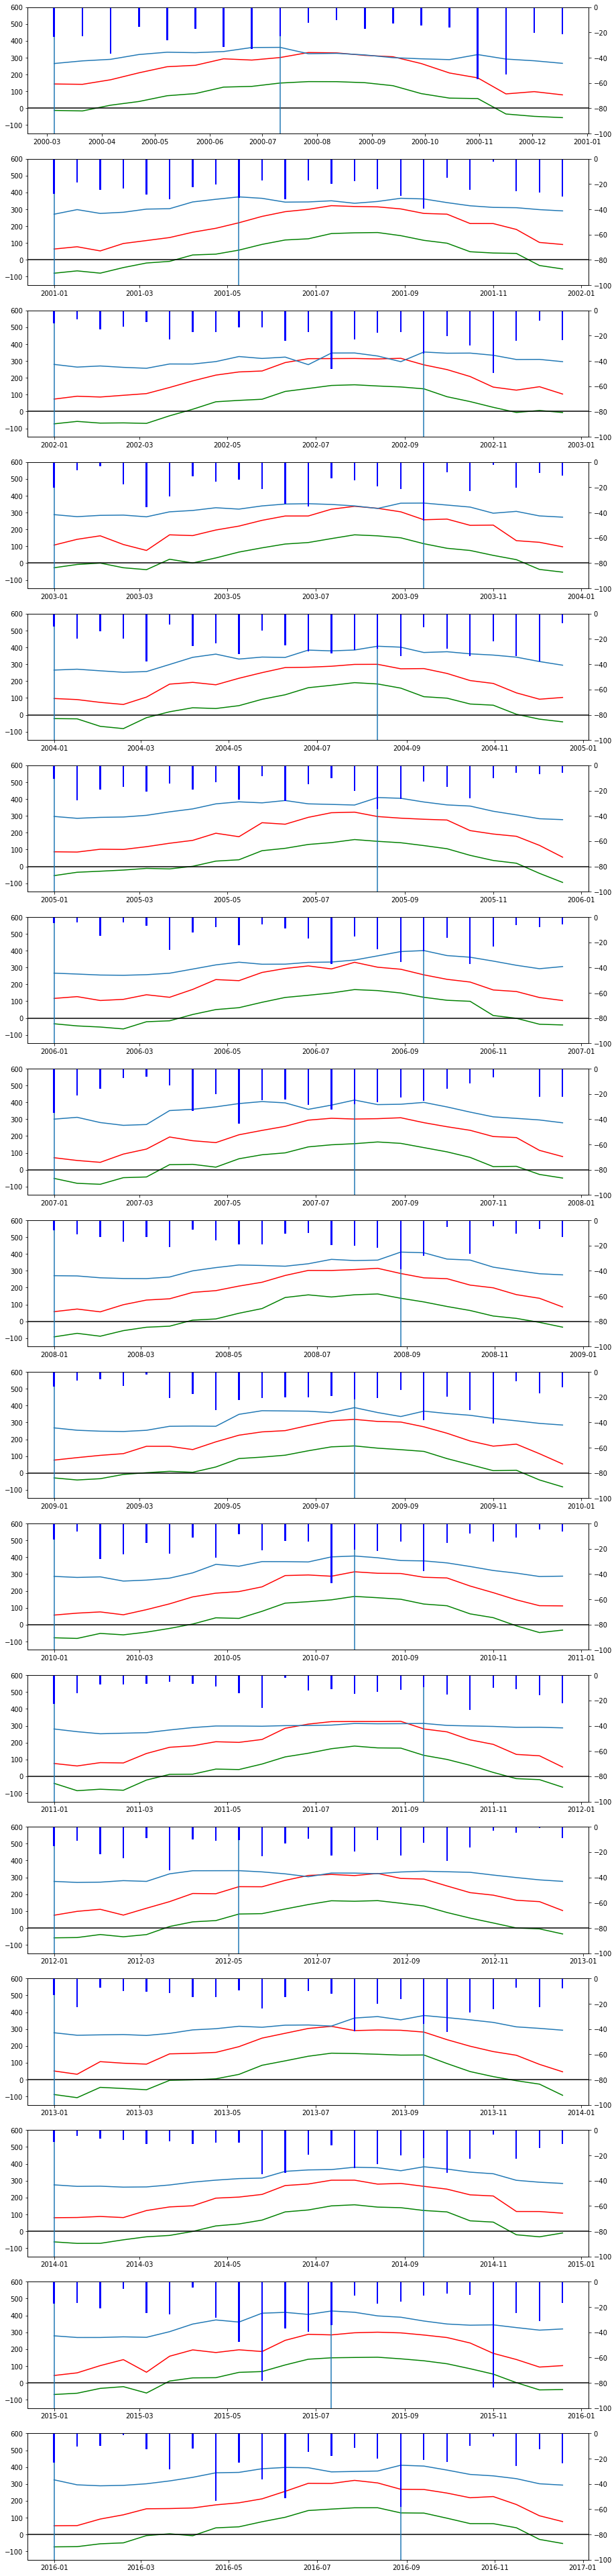

In [323]:
fig,axs = plt.subplots(17,1,figsize=(15,70))
for ax, year in zip(axs.flatten(),range(2000,2017)):
    
    data = model_data[model_data.index.year==year]
    maximum = data.index[data['NDVI']==data['NDVI'].max()]
    first_frost= data.index[data['TMIN']<=0].min()
    ax.plot(data.index, data['TMAX'],label='max temp', color='red')
    ax.plot(data.index, data['TMIN'], label='min temp', color='green')
    ax.axhline(y=0, label='freezing point',color='black')
    ax.plot(data.index, data['NDVI']/10)
    ax.axvline(maximum)
    ax.axvline(first_frost)
    #ax.bar(model_data.index, model_data['PRCP'].astype(float))
    ax2 = ax.twinx()
    ax2.bar(data.index, -data['PRCP'].astype(float), 1,label='precipitation',color='blue')
    
    ax.set_ylim(-150,600)
    ax2.set_ylim(-100,0)
    

In [ ]:
model_data.index[model_data['NDVI']==model_data['NDVI'].max()]

In [ ]:
model_data.index[model_data['TMIN']<=0 and model_data.index.month.isin([8,9,10,11])]

In [ ]:
model_data.index[model_data.index.month.isin([8,9,10,11])][model_data.index.month.isin([8,9,10,11])[model_data['TMIN']<=0]]